# Assignment 2

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
from math import pi
%matplotlib inline

### Load Dataset

In [2]:
#Import Data
stock_data = pd.read_excel('PS1-2_Studynet.xlsx')

#Clean Header
stock_data.columns = stock_data.columns.str.replace("Equity", "")
stock_data.columns = stock_data.columns.str.replace("SE", "")
stock_data.columns = stock_data.columns.str.replace("SW", "")
stock_data.columns = stock_data.columns.str.replace(" ", "")
stock_data = stock_data.set_index('Date')
stock_data = stock_data.loc['2010-01-01':'2017-12-29']

stock_data['LISN'] = stock_data.LISN / stock_data.LISN.shift(1) - 1
stock_data['BAER'] = stock_data.BAER / stock_data.BAER.shift(1) - 1
stock_data.head()

#print(type(stock_data.index))

,ABBN,SPSN,SIKA,LOGN,PGHN,DOKA,ZURN,AMS,GIVN,SOON,...,LONN,CLN,NESN,ARYN,HELN,GEBN,FHZN,ROG,PSPN,UBSG
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,19.94,56.57,26.92,17.93,130.6,249.10,226.5,4.53,826.5,125.5,...,67.62,12.146,50.20,38.074,320.75,183.5,62.25,175.8,58.50,16.05
2010-01-08,21.05,57.69,27.75,18.65,138.2,257.25,232.4,5.10,863.0,128.9,...,73.13,12.573,49.11,38.667,334.75,185.3,62.35,178.5,61.30,17.21
2010-01-15,20.61,59.00,27.37,18.65,132.0,257.25,233.0,5.23,868.5,132.1,...,75.86,12.513,49.12,39.407,331.00,191.2,60.70,184.4,61.90,16.10
2010-01-22,19.26,58.22,26.40,18.44,131.4,263.00,226.9,5.59,873.0,133.6,...,73.08,11.609,50.55,40.988,326.50,189.2,58.50,184.8,60.60,14.93
2010-01-29,19.45,58.22,27.18,18.13,132.0,266.25,227.6,5.60,869.5,131.9,...,70.07,11.688,50.50,41.580,331.75,187.7,60.00,178.5,60.95,14.03


### Excercise 1.1

In [3]:
def emp_mad(data):
    return np.mean(np.absolute(data - np.mean(data)))

def norm_mad(data):
    return np.sqrt(2/pi)*np.std(data)

def semidev(data):
    return np.sqrt(np.mean(np.power(np.minimum(data,np.mean(data)),2)))

def exp_shortfall(alpha,data):
    #condiational variance, expected shortfall
    
    mu = np.mean(data)
    sigma = np.std(data)
    
    return (1 - alpha)** -1 * norm.pdf(norm.ppf(alpha))*sigma - mu

### Excersise 1.2

In [4]:
def emp_expshort(data, alpha):
    
    def delta(ret, vara):
        if ret < (vara*-1):
            return 1
        else:
            return 0
    
    def varalpha(data, alpha):
        return - (np.mean(data) - norm.ppf(alpha)*np.std(data))
    
    vara = varalpha(data, alpha)
    
    sum_delta = []
    
    for i in range(0,len(data)):
        sum_delta.append(delta(data[i], vara))

    ES = (-1/np.sum(sum_delta))*np.sum(sum_delta * data)
    
    return ES 

print(emp_expshort(stock_data['LISN'], 0.01))
print(emp_expshort(stock_data['LISN'], 0.05))

-0.0019138388926026048
-0.0004961411644774286


In [27]:
output = {'LISN':   [round(np.std(stock_data['LISN']),6), 
                         emp_mad(stock_data['LISN']),
                         norm_mad(stock_data['LISN']),
                         semidev(stock_data['LISN']), 
                         exp_shortfall(0.05,stock_data['LISN']), 
                         exp_shortfall(0.01,stock_data['LISN']), 
                         emp_expshort(stock_data['LISN'], 0.05),
                         emp_expshort(stock_data['LISN'], 0.01)], 
          
          'BAER':   [round(np.std(stock_data['BAER']),6), 
                         emp_mad(stock_data['BAER']),
                         norm_mad(stock_data['BAER']),
                         semidev(stock_data['BAER']), 
                         exp_shortfall(0.05,stock_data['BAER']), 
                         exp_shortfall(0.01,stock_data['BAER']),
                         emp_expshort(stock_data['BAER'], 0.05),
                         emp_expshort(stock_data['BAER'], 0.01)]}

ouput_table = pd.DataFrame(data = output, index = ['Standard deviation', 'Empirical MAD','Normal MAD','Semi-standard deviation', 
                                                   'Exp. Shortfall 95%',
                                                   'Exp. Shortfall 99%', 
                                                   'Empirical Ecpected Shortfall 95%',
                                                   'Empirical Ecpected Shortfall 99%',])
ouput_table

,LISN,BAER
Standard deviation,0.022428,0.038053
Empirical MAD,0.017053,0.026997
Normal MAD,0.017895,0.030362
Semi-standard deviation,0.015011,0.026697
Exp. Shortfall 95%,-0.000267,0.002154
Exp. Shortfall 99%,-0.002098,-0.000953
Empirical Ecpected Shortfall 95%,-0.000496,0.002799
Empirical Ecpected Shortfall 99%,-0.001914,-0.000675


### Excersice 1.3

In [40]:
print("The Sdv in CHF for LISN is", round(np.std(stock_data['LISN'])*np.sqrt(4) * 1000000,2))
print("The Sdv in CHF for BAER is", round(np.std(stock_data['BAER'])*np.sqrt(4) * 1000000,2))

The Sdv in CHF for LISN is 44856.28
The Sdv in CHF for BAER is 76105.06


### Excersise 1.4

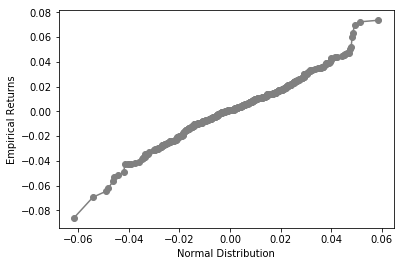

In [7]:
returns_sorted = stock_data.sort_values('LISN')['LISN']
sdt_norm = pd.DataFrame(np.random.normal(np.mean(stock_data['LISN']),np.std(stock_data['LISN']),size = len(stock_data['LISN'])))
sdt_norm = sdt_norm.sort_values(0)


plt.plot(sdt_norm, returns_sorted, color = 'grey', label = 'QQ', marker ='o')

plt.xlabel('Normal Distribution')
plt.ylabel('Empirical Returns')

plt.show()

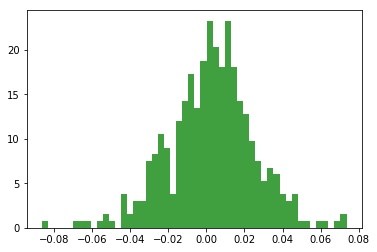

In [8]:
plt.hist(stock_data['LISN'][1:], 50 ,density = True, facecolor='g', alpha=0.75)
p = np.random.normal(np.mean(stock_data['LISN']),np.std(stock_data['LISN']),size = len(stock_data['LISN']))

plt.show()

### Excersise 2

In [80]:
def emp_var(data, alpha, asset):
    
    index = int(np.around((len(data[asset]) / 100 * alpha)))
    
    returns_sorted = data.sort_values(asset)[asset]
    
    return returns_sorted[index]    

In [78]:
stock_data2 = pd.read_excel('PS2-2.xlsx')
stock_data2 = stock_data2.set_index('Date')

cols = ['WMT (Walmart)', 
        'AAPL (Apple)', 
        'DIS (The Walt Disney Company)', 
        'IBM (International Business Machines Corporation)', 
        'JNJ (Johnson & Johnson)',
        'KO (The Coca-Cola Company)',
        'NKE (NIKE, Inc.)',
        'TXN (Texas Instruments Incorporated)']

for i in range(0,len(cols)):
    stock_data2['Return ' + cols[i]] = stock_data2[cols[i]]/stock_data2[cols[i]].shift(1) - 1

cols = stock_data2.columns

#Drop fist row with Nan Returns
stock_data2 = stock_data2.drop(stock_data2.index[0])
#stock_data2[stock_data2.name != 'nan']

stock_data2.head()

,WMT (Walmart),AAPL (Apple),DIS (The Walt Disney Company),IBM (International Business Machines Corporation),JNJ (Johnson & Johnson),KO (The Coca-Cola Company),"NKE (NIKE, Inc.)",TXN (Texas Instruments Incorporated),Return WMT (Walmart),Return AAPL (Apple),Return DIS (The Walt Disney Company),Return IBM (International Business Machines Corporation),Return JNJ (Johnson & Johnson),Return KO (The Coca-Cola Company),"Return NKE (NIKE, Inc.)",Return TXN (Texas Instruments Incorporated)
Date,,,,,,,,,,,,,,,,
2015-01-13,80.844254,103.152313,90.499176,134.107681,94.493309,37.982288,44.858578,48.042622,-0.007887,0.008879,0.007728,0.002365,0.001721,-0.000235,-0.008867,-0.006212
2015-01-14,78.400185,102.759262,89.586502,133.243927,93.807800,37.919918,44.244785,47.969810,-0.030232,-0.003810,-0.010085,-0.006441,-0.007255,-0.001642,-0.013683,-0.001516
2015-01-15,79.097206,99.970337,89.700562,132.191986,92.445770,37.759544,43.819859,47.678593,0.008891,-0.027140,0.001273,-0.007895,-0.014519,-0.004229,-0.009604,-0.006071
2015-01-16,78.545029,99.193558,90.489670,134.389893,93.843887,37.893192,43.904850,48.497650,-0.006981,-0.007770,0.008797,0.016627,0.015124,0.003539,0.001940,0.017179
2015-01-20,78.472610,101.748512,90.071350,134.227402,91.363388,38.454494,44.197578,48.970882,-0.000922,0.025757,-0.004623,-0.001209,-0.026432,0.014813,0.006667,0.009758


### Excersise 2.1

In [10]:
def varalpha(data, alpha):
    return - (np.mean(data) - norm.ppf(alpha) * np.std(data))

In [81]:
output2 = {cols[8]:   [varalpha(stock_data2[cols[8]], 0.05),  varalpha(stock_data2[cols[8]], 0.01),  emp_var(stock_data2, 5, cols[8]),  emp_var(stock_data2, 1, cols[8])],  
           cols[9]:   [varalpha(stock_data2[cols[9]], 0.05),  varalpha(stock_data2[cols[9]], 0.01),  emp_var(stock_data2, 5, cols[9]),  emp_var(stock_data2, 1, cols[9])], 
           cols[10]:  [varalpha(stock_data2[cols[10]], 0.05), varalpha(stock_data2[cols[10]], 0.01), emp_var(stock_data2, 5, cols[10]),  emp_var(stock_data2, 1, cols[10])], 
           cols[11]:  [varalpha(stock_data2[cols[11]], 0.05), varalpha(stock_data2[cols[11]], 0.01), emp_var(stock_data2, 5, cols[11]),  emp_var(stock_data2, 1, cols[11])], 
           cols[12]:  [varalpha(stock_data2[cols[12]], 0.05), varalpha(stock_data2[cols[12]], 0.01), emp_var(stock_data2, 5, cols[12]),  emp_var(stock_data2, 1, cols[12])], 
           cols[13]:  [varalpha(stock_data2[cols[13]], 0.05), varalpha(stock_data2[cols[13]], 0.01), emp_var(stock_data2, 5, cols[13]),  emp_var(stock_data2, 1, cols[13])], 
           cols[14]:  [varalpha(stock_data2[cols[14]], 0.05), varalpha(stock_data2[cols[14]], 0.01), emp_var(stock_data2, 5, cols[14]),  emp_var(stock_data2, 1, cols[14])],
           cols[15]:  [varalpha(stock_data2[cols[15]], 0.05), varalpha(stock_data2[cols[15]], 0.01), emp_var(stock_data2, 5, cols[15]),  emp_var(stock_data2, 1, cols[15])], 
          }

ouput_table2 = pd.DataFrame(data = output2, index = ['95% Var', '99% Var', 'Emp Var 95%', 'Emp Var 99%'])
ouput_table2

,Return WMT (Walmart),Return AAPL (Apple),Return DIS (The Walt Disney Company),Return IBM (International Business Machines Corporation),Return JNJ (Johnson & Johnson),Return KO (The Coca-Cola Company),"Return NKE (NIKE, Inc.)",Return TXN (Texas Instruments Incorporated)
95% Var,-0.020389,-0.024263,-0.019665,-0.019964,-0.014920,-0.013438,-0.023553,-0.023741
99% Var,-0.028703,-0.033984,-0.027673,-0.028111,-0.020862,-0.018896,-0.033083,-0.033094
Emp Var 95%,-0.016293,-0.022758,-0.016871,-0.017204,-0.014105,-0.013072,-0.019353,-0.022316
Emp Var 99%,-0.030817,-0.035013,-0.035208,-0.036144,-0.021879,-0.022764,-0.036993,-0.035976


### Excersise 2.2

In [12]:
xls = pd.ExcelFile('PS2-2.xlsx')
apple_data = pd.read_excel(xls, 'AAPL')
apple_data = apple_data.set_index('Date')
apple_data['Return AAPL (Apple)'] = apple_data['AAPL Adj Close']/apple_data['AAPL Adj Close'].shift(1) - 1

apple_returns = list(stock_data2['Return AAPL (Apple)'])
apple_data2 = list(apple_data['Return AAPL (Apple)'])
apple_data2[0] = 0.010326

apple_series = apple_returns + apple_data2

In [13]:
rolling_var = []
for i in range(0,20):
    
    rolling_var.append(varalpha(apple_series[0+i:756+i], 0.05))

var_exceeded = [0]*20
for i in range(0,19):
    
    if rolling_var[i] > apple_series[756+i]:
        var_exceeded[i] = 1

print(var_exceeded)        

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]


In [84]:
print(np.round(apple_series[756:],4))
# The follwing returns are below the Var (-0.0275  at 08.02; -0.025 at 05.02; -0.0434 at 02.02)

[ 0.0103 -0.0051  0.0165  0.0009 -0.0045 -0.0082  0.0002 -0.0159 -0.0179
  0.0023 -0.0207 -0.0059  0.0028  0.0021 -0.0434 -0.025   0.0418 -0.0214
 -0.0275  0.0122  0.0403]


### Excersise 2.3

In [16]:
def portfolio_ret(w, expected_returns):
    return np.round(np.sum(expected_returns * w),6)

def portfolio_vol(w, cov_mat):
    return np.dot(np.dot(w.T,cov_mat), w)

In [17]:
portfolio_weights = np.divide([55000, 15000, 23400, 43200, 131000, 321000, 104000, 38700],
                              np.sum([55000, 15000, 23400, 43200, 131000, 321000, 104000, 38700]))

assets_mean = np.mean(stock_data2[cols[8:]])

cov_mat = np.round(np.cov(stock_data2.iloc[:,8:].values.T[:]),6)

portfolio_return = portfolio_ret(portfolio_weights, assets_mean)

portfolio_std = np.sqrt(portfolio_vol(portfolio_weights, cov_mat))

0.000428
0.006816381278042547


In [18]:
portfolio_value_at_risk =  - portfolio_return + norm.ppf(1-0.05) * portfolio_std
print(portfolio_value_at_risk)

0.010783949467872396


### Excercise 2.4

In [19]:
def portfolio_return_series(assets, weights):
    #assets is return series 
    p_retseries = []
    
    for i in range(0,len(assets.iloc[:,8:].values)):
        p_retseries.append(np.sum((assets.iloc[:,8:].values[i] * portfolio_weights)[0]))
    
    return p_retseries

p_retseries = portfolio_return_series(stock_data2, portfolio_weights)

In [20]:
def marginal_port_val(alpha, data):
    
    z = norm.ppf(1-alpha)
    
    sigma_ip = np.cov(data, p_retseries)[0][1]
    
    sigma_P = portfolio_std
    
    marginal_var = (sigma_ip/sigma_P) * z
    
    return marginal_var

In [21]:
for i in range(8,15):
    
    print(cols[i])
    print(marginal_port_val(0.05, stock_data2[cols[i]]))
    
    marginal_var = []
    marginal_var.append(marginal_port_val(0.05, stock_data2[cols[i]]))

Return WMT (Walmart)
0.0027048311727873634
Return AAPL (Apple)
0.0006629782159995204
Return DIS (The Walt Disney Company)
0.0005410807565958604
Return IBM (International Business Machines Corporation)
0.0006704009310633723
Return JNJ (Johnson & Johnson)
0.0005474282505383479
Return KO (The Coca-Cola Company)
0.0005286769178026519
Return NKE (NIKE, Inc.)
0.0007488853554698901


###  Excercise 2.5

In [22]:
print(portfolio_weights*marginal_var/portfolio_value_at_risk)

[0.00522281 0.0014244  0.00222207 0.00410228 0.01243979 0.03048225
 0.00987587 0.00367496]


###  Excercise 2.6

In [23]:
#See word

###  Excercise 2.7

In [24]:
np.random.seed(1)

time_series = np.zeros((1000,len(stock_data2['Return AAPL (Apple)'])))

for i in range(0,999):
    randint = np.int_(np.random.uniform(low = 1, high = len(stock_data2['Return AAPL (Apple)']), size = 1000))
    
    for j in range(1,len(stock_data2['Return AAPL (Apple)'])):
        time_series[i][j] = stock_data2['Return AAPL (Apple)'][randint[j]]  

In [97]:
st_dev = []
emp_var99 = [] 
emp_var95 = []
emp_var952 = []

def emp_var2(data, alpha):
    
    index = int(np.around((len(data) / 100 * alpha)))
    
    returns_sorted = np.sort(data)
    
    return returns_sorted[index]    


for i in range(0,999):
    st_dev.append(np.std(time_series[i]))
    emp_var99.append(emp_var2(time_series[i], 1))
    emp_var95.append(emp_var2(time_series[i], 5))
    
std_sorted = np.sort(st_dev)
emp_var99_sorted = np.sort(emp_var99)
emp_var95_sorted = np.sort(emp_var95)

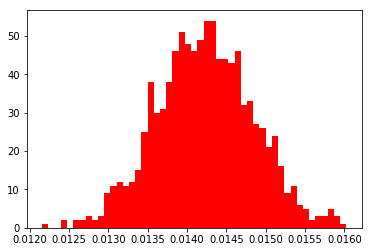

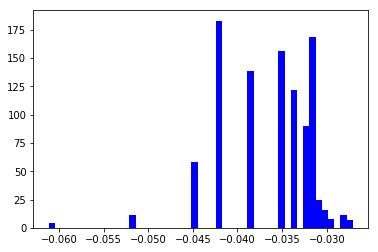

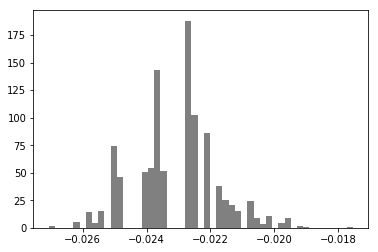

In [98]:
# Many timeseries have the same values that are below the var. For that reaosn 

plt.hist(std_sorted, bins = np.linspace(std_sorted.min(),std_sorted.max()), color = 'red')
plt.show()

plt.hist(emp_var99_sorted, bins = np.linspace(emp_var99_sorted.min(),emp_var99_sorted.max()), color = 'blue')
plt.show()

plt.hist(emp_var95_sorted, bins = np.linspace(emp_var95_sorted.min(),emp_var95_sorted.max()), color = 'grey')
plt.show()